In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


In [3]:
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.optimizers import Adagrad
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.models import Sequential
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
#load training dataset as dataframe
file_path1 = '/content/drive/MyDrive/Final year project/datafinal/processed_train.csv'
df = pd.read_csv(file_path1)

In [5]:
X = df.drop(labels='class', axis=1) #splitting the main training data into test and train data so as to get accuracy measures
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=4)

Epoch 1/5
1344/1344 [==============================] - 153s 104ms/step - loss: 0.6633 - accuracy: 0.5818 - val_loss: 0.6905 - val_accuracy: 0.5400
Epoch 2/5
1344/1344 [==============================] - 134s 100ms/step - loss: 0.6669 - accuracy: 0.5674 - val_loss: 0.3721 - val_accuracy: 0.9163
Epoch 3/5
1344/1344 [==============================] - 139s 104ms/step - loss: 0.6391 - accuracy: 0.6063 - val_loss: 0.3159 - val_accuracy: 0.9268
Epoch 4/5
1344/1344 [==============================] - 139s 103ms/step - loss: 0.4532 - accuracy: 0.8198 - val_loss: 0.3698 - val_accuracy: 0.8797
Epoch 5/5
1344/1344 [==============================] - 139s 104ms/step - loss: 0.4031 - accuracy: 0.8483 - val_loss: 0.3242 - val_accuracy: 0.8803
training period: 753.9555189609528
158/158 [==============================] - 7s 24ms/step
Test Loss: 0.3242136240005493
Test Accuracy: 0.880333423614502
Precision: 0.8501984126984127
Recall: 0.9448732083792724
F1 Score: 0.8950391644908616
False Positive Rate: 0.14

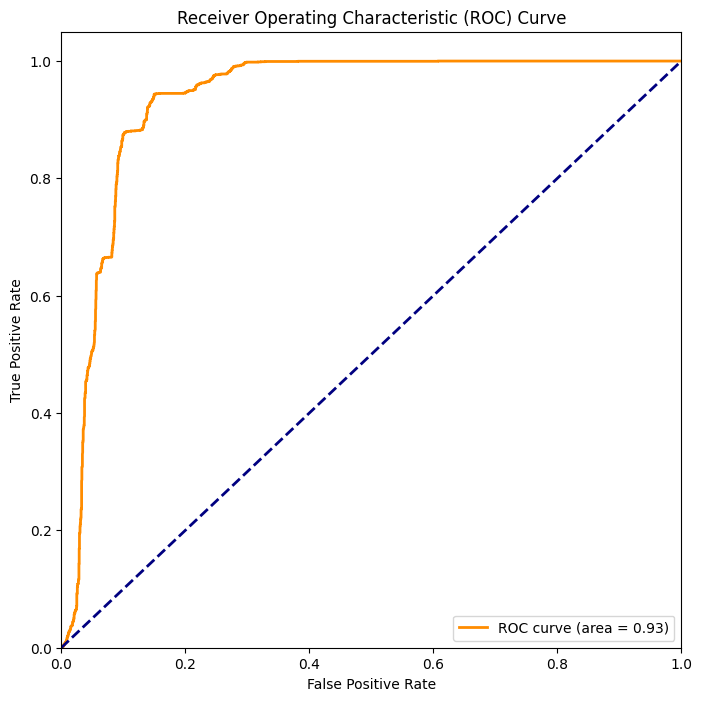

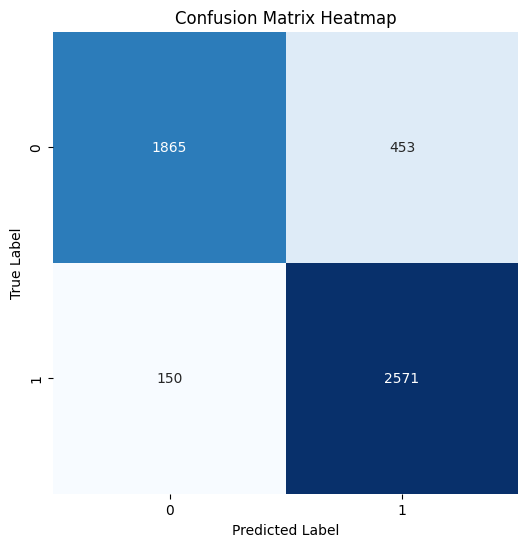

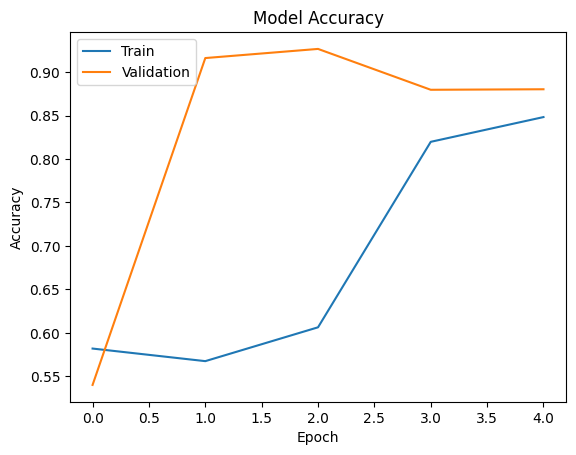

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your data (X_train, y_train, X_test, y_test) ready

input_shape = (41, 1)

model_with_lstm4 = Sequential([
    LSTM(64, input_shape=input_shape, return_sequences=True),  # LSTM layer
    LSTM(32, return_sequences=True),  # Another LSTM layer
    Dropout(0.25),
    LSTM(16, return_sequences=True),  # A third LSTM layer
    Dropout(0.25),
    LSTM(8, return_sequences=True),  # Fourth LSTM layer
    LSTM(4, return_sequences=True),  # Fifth LSTM layer
    LSTM(2),  # Sixth LSTM layer
    Dropout(0.25),
    Dense(1, activation='sigmoid')  # Output layer
])

model_with_lstm4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
import time
start_time = time.time()
history_lstm4 = model_with_lstm4.fit(X_train, y_train, batch_size=15, epochs=5, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])
end_time = time.time()
print("training period:", end_time - start_time)

# Evaluate the model on the test set
score_lstm4 = model_with_lstm4.evaluate(X_test, y_test)

# Make predictions on the test set
y_pred_lstm4 = model_with_lstm4.predict(X_test)

# Handle NaN values in predictions
y_pred_lstm4 = np.nan_to_num(y_pred_lstm4, nan=0)

# Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
threshold_lstm4 = 0.5
y_pred_binary_lstm4 = np.round(y_pred_lstm4)

# Additional performance metrics
precision_lstm4 = precision_score(y_test, y_pred_binary_lstm4)
recall_lstm4 = recall_score(y_test, y_pred_binary_lstm4)
f1_lstm4 = f1_score(y_test, y_pred_binary_lstm4)
false_positive_rate_lstm4 = confusion_matrix(y_test, y_pred_binary_lstm4)[0, 1] / (
        confusion_matrix(y_test, y_pred_binary_lstm4)[0, 1] + confusion_matrix(y_test, y_pred_binary_lstm4)[1, 1])

print("Test Loss:", score_lstm4[0])
print("Test Accuracy:", score_lstm4[1])
print("Precision:", precision_lstm4)
print("Recall:", recall_lstm4)
print("F1 Score:", f1_lstm4)
print("False Positive Rate:", false_positive_rate_lstm4)

# ROC Curve
fpr_lstm4, tpr_lstm4, thresholds_lstm4 = roc_curve(y_test, y_pred_lstm4)
roc_auc_lstm4 = auc(fpr_lstm4, tpr_lstm4)

plt.figure(figsize=(8, 8))
plt.plot(fpr_lstm4, tpr_lstm4, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lstm4))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_mat_lstm4 = confusion_matrix(y_test, y_pred_binary_lstm4)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat_lstm4, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot training history
plt.plot(history_lstm4.history['accuracy'])
plt.plot(history_lstm4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



In [ ]:
model_with_lstm4.save('/content/drive/My Drive/Final year project/models/model_with_lstm4.keras')

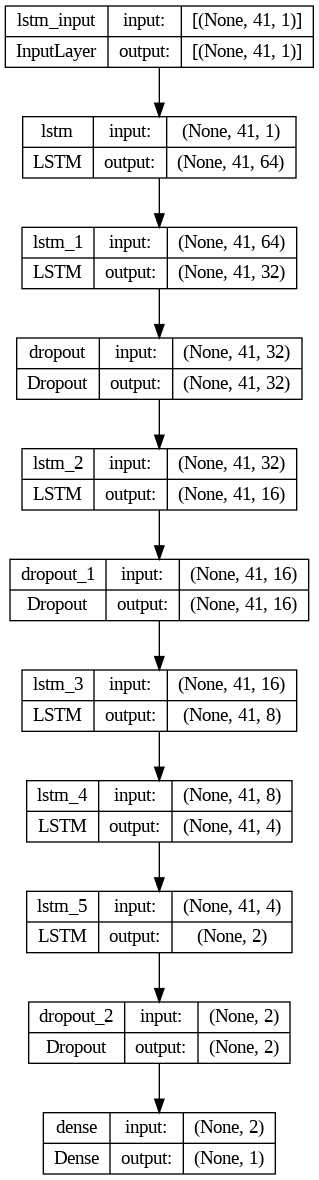

In [ ]:
plot_model(model_with_lstm4, to_file='/content/drive/My Drive/Final year project/models/model architectures/model_with_lstm4.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

input_shape = (41, 1)

model_with_lstm5 = Sequential([
    LSTM(64, input_shape=input_shape, return_sequences=True),  # LSTM layer
    LSTM(32, return_sequences=True),  # Another LSTM layer
    Dropout(0.25),
    LSTM(16, return_sequences=True),  # A third LSTM layer
    Dropout(0.25),
    LSTM(8, return_sequences=True),  # Fourth LSTM layer
    LSTM(4, return_sequences=True),  # Fifth LSTM layer
    LSTM(2, return_sequences=True),  # Sixth LSTM layer
    LSTM(1),  # Seventh LSTM layer
    Dropout(0.25),
    Dense(1, activation='sigmoid')  # Output layer
])

model_with_lstm5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history11 = model_with_lstm5.fit(X_train, y_train, batch_size=15, epochs=20, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/20
1344/1344 [==============================] - 171s 116ms/step - loss: 0.4469 - accuracy: 0.8144 - val_loss: 0.3202 - val_accuracy: 0.9216
Epoch 2/20
1344/1344 [==============================] - 155s 115ms/step - loss: 0.4439 - accuracy: 0.7470 - val_loss: 0.4845 - val_accuracy: 0.9244
Epoch 3/20
1344/1344 [==============================] - 149s 111ms/step - loss: 0.4628 - accuracy: 0.8288 - val_loss: 0.3539 - val_accuracy: 0.9339
Epoch 4/20
1344/1344 [==============================] - 145s 108ms/step - loss: 0.4344 - accuracy: 0.8266 - val_loss: 0.2986 - val_accuracy: 0.9393
Epoch 5/20
1344/1344 [==============================] - 156s 116ms/step - loss: 0.3945 - accuracy: 0.8432 - val_loss: 0.2717 - val_accuracy: 0.9450
Epoch 6/20
1344/1344 [==============================] - 152s 113ms/step - loss: 0.3846 - accuracy: 0.8439 - val_loss: 0.2511 - val_accuracy: 0.9482
Epoch 7/20
1344/1344 [==============================] - 147s 109ms/step - loss: 0.4164 - accuracy: 0.8241 - val_

In [ ]:
model_with_lstm5.save('/content/drive/My Drive/Final year project/models/model_with_lstm5.keras')

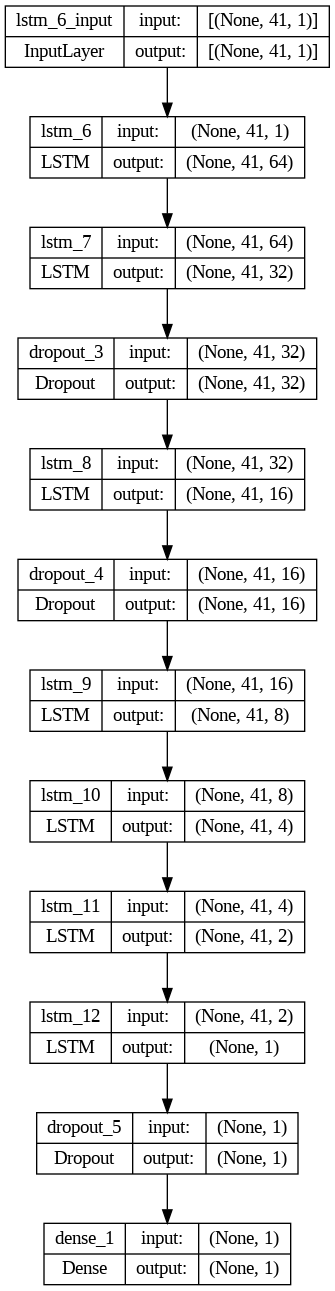

In [ ]:
plot_model(model_with_lstm5, to_file='/content/drive/My Drive/Final year project/models/model architectures/model_with_lstm5.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

input_shape = (41, 1)

model_with_lstm6 = Sequential([
    LSTM(64, input_shape=input_shape, return_sequences=True),  # LSTM layer
    LSTM(32, return_sequences=True),  # Another LSTM layer
    Dropout(0.25),
    LSTM(16, return_sequences=True),  # A third LSTM layer
    Dropout(0.25),
    LSTM(8, return_sequences=True),  # Fourth LSTM layer
    LSTM(4, return_sequences=True),  # Fifth LSTM layer
    LSTM(2, return_sequences=True),  # Sixth LSTM layer
    LSTM(1, return_sequences=True),  # Seventh LSTM layer
    LSTM(1),  # Eighth LSTM layer
    Dropout(0.25),
    Dense(1, activation='sigmoid')  # Output layer
])

model_with_lstm6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history12 = model_with_lstm4.fit(X_train, y_train, batch_size=15, epochs=5, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/5
1344/1344 [==============================] - 161s 120ms/step - loss: 0.1141 - accuracy: 0.9471 - val_loss: 0.0526 - val_accuracy: 0.9809
Epoch 2/5
1344/1344 [==============================] - 133s 99ms/step - loss: 0.1328 - accuracy: 0.9302 - val_loss: 0.0742 - val_accuracy: 0.9686
Epoch 3/5
1344/1344 [==============================] - 138s 103ms/step - loss: 0.1240 - accuracy: 0.9398 - val_loss: 0.1017 - val_accuracy: 0.9770
Epoch 4/5
1344/1344 [==============================] - 139s 104ms/step - loss: 0.1127 - accuracy: 0.9470 - val_loss: 0.0684 - val_accuracy: 0.9740


In [ ]:
model_with_lstm6.save('/content/drive/My Drive/Final year project/models/model_with_lstm6.keras')

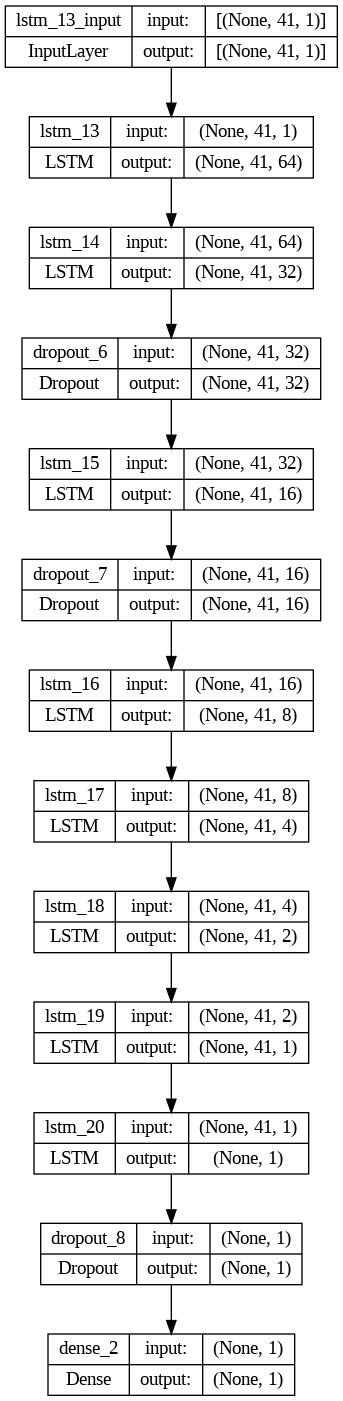

In [ ]:
plot_model(model_with_lstm6, to_file='/content/drive/My Drive/Final year project/models/model architectures/model_with_lstm6.png', show_shapes=True, show_layer_names=True)